In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time
import random

In [ ]:
Data=loadmat("/content/gdrive/MyDrive/Old_ADA_Bridge-damage_vibration_data.mat")

In [ ]:
class dataMatrix:
    def __init__(self,data):
        self.data=dict()
        self.classes=['time','a1','a2','a3','a4','a5','a6','a7','a8','o1','o2','o3']
        try:
            for i in range(12):
                self.data[self.classes[i]]=data[:8868,i] # 8868
        except:
            return
        

In [ ]:
class matData:
    def __init__(self,data):
        self.header='VBA'
        self.data=dict()
        for i in range(1,8):
            new_data=dict()
            for j in range(1,13,1):
                if data['VBA'][i][j].shape==(1,0):
                    continue
                else:
                    new_data['no'+str(j)]=dataMatrix(data['VBA'][i][j])
#                     print(new_data['no'+str(j)].data['time'].shape)
            self.data[data['VBA'][i][0][0]]=new_data
        

In [ ]:
dataObj=matData(Data)
classes=['time','a1','a2','a3','a4','a5','a6','a7','a8','o1','o2','o3']
case=['INT 30km','INT 50km','INT 40km','RCV 40km','DMG1 40km','DMG2 40km','DMG3 40km']

In [ ]:
x_train=[]
y_train=[]
for i in case[:4]:
    keys=dataObj.data[i].keys()
    for j in keys:
        all_sensor_data=[]
        for k in classes[1:-3]:
            all_sensor_data.append(dataObj.data[i][j].data[k])
        y_train.append(1)
        x_train.append(all_sensor_data)
            
for i in case[4:]:
    keys=dataObj.data[i].keys()
    for j in keys:
        all_sensor_data=[]
        for k in classes[1:-3]:
            all_sensor_data.append(dataObj.data[i][j].data[k])
        y_train.append(0)
        x_train.append(all_sensor_data)
           
X=np.array(np.expand_dims(x_train,axis=-1))
Y=np.array(np.expand_dims(y_train,axis=-1))
print(X.shape)
print(Y.shape)

(68, 8, 8868, 1)
(68, 1)


In [ ]:
x_train_ss=[]
y_train_ss=[]
for i in case[:4]:
    keys=dataObj.data[i].keys()
    for j in keys:
        for k in classes[1:-3]:
            x_train_ss.append(dataObj.data[i][j].data[k])
            y_train_ss.append(1)
            
for i in case[4:]:
    keys=dataObj.data[i].keys()
    for j in keys:
        all_sensor_data=[]
        for k in classes[1:-3]:
            x_train_ss.append(dataObj.data[i][j].data[k])
            y_train_ss.append(0)
           
X=np.array(np.expand_dims(x_train_ss,axis=-1))
Y=np.array(np.expand_dims(y_train_ss,axis=-1))
print(X.shape)
print(Y.shape)

(544, 8868, 1)
(544, 1)


In [ ]:
def shuffle(a,b):
  c=[]
  for i in range(len(a)):
    c.append([a[i],b[i]])
  # print(c)
  random.shuffle(c)
  # print(c)
  a=np.array([i[0] for i in c])
  b=np.array([i[1] for i in c])
  return a,b

In [ ]:
device='cuda:0' if torch.cuda.is_available() else "cpu"

In [ ]:
X_data,Y_data=shuffle(X,Y)
x_data=torch.Tensor(X_data).to(device)
y_data=torch.Tensor(Y_data).to(device)

In [ ]:
print(x_data.shape)
print(y_data.shape)

torch.Size([544, 8868, 1])
torch.Size([544, 1])


In [ ]:
torch.sum(abs(x_data[0]))

tensor(1475.1689, device='cuda:0')

In [ ]:
class Model1(torch.nn.Module):
  def __init__(self):
    super(Model1,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(1,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(8,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model2(torch.nn.Module):
  def __init__(self):
    super(Model2,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(16,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model4(torch.nn.Module):
  def __init__(self):
    super(Model4,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(4,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model5(torch.nn.Module):
  def __init__(self):
    super(Model5,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(5,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model20(torch.nn.Module):
  def __init__(self):
    super(Model20,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(20,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
class Model100(torch.nn.Module):
  def __init__(self):
    super(Model100,self).__init__()
    self.model=torch.nn.Sequential(
        torch.nn.Linear(100,1), # mean,variance,std,distance
        # torch.nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.model(x)

In [ ]:
from scipy.stats import skew,kurtosis

In [ ]:
##### preparing new data mean,variance, std.
mean_array=[]
variance_array=[]
std_array=[]
skew_array=[]
kurtosis_array=[]
for i in range(len(x_data)):
  mean_=[]
  variance_=[]
  std_=[]
  skew_=[]
  kurtosis_=[]
  for j in range(8):
    mean=torch.mean(abs(x_data[i][j]))
    std=torch.std(abs(x_data[i][j]))
    variance=std*std
    mean_.append(mean)
    variance_.append(variance)
    std_.append(std)
    skew_.append(skew(X_data[i][j],axis=0,bias=False)[0])
    kurtosis_.append(kurtosis(X_data[i][j],axis=0,fisher=True,bias=False)[0])
  mean_array.append(mean_)
  variance_array.append(variance_)
  std_array.append(std_)
  skew_array.append(skew_)
  kurtosis_array.append(kurtosis_)
mean_array=torch.Tensor(mean_array).to(device)
variance_array=torch.Tensor(variance_array).to(device)
std_array=torch.Tensor(std_array).to(device)
skew_array=torch.Tensor(skew_array).to(device)
kurtosis_array=torch.Tensor(kurtosis_array).to(device)
print(skew_array.shape)

TypeError: ignored

In [ ]:
##### preparing new data mean,variance, std. ONLY FOR SINGLE SENSOR PREDICTION.
mean_array=[]
variance_array=[]
std_array=[]
skew_array=[]
kurtosis_array=[]
for i in range(len(x_data)):

  mean=torch.mean(abs(x_data[i]))
  std=torch.std(abs(x_data[i]))
  variance=std*std
  mean_=[mean]
  variance_=[variance]
  std_=[std]
  skew_=[skew(X_data[i],axis=0,bias=False)[0]]
  kurtosis_=[kurtosis(X_data[i],axis=0,fisher=True,bias=False)[0]]

  mean_array.append(mean_)
  variance_array.append(variance_)
  std_array.append(std_)
  skew_array.append(skew_)
  kurtosis_array.append(kurtosis_)

mean_array=torch.Tensor(mean_array).to(device)
variance_array=torch.Tensor(variance_array).to(device)
std_array=torch.Tensor(std_array).to(device)
skew_array=torch.Tensor(skew_array).to(device)
kurtosis_array=torch.Tensor(kurtosis_array).to(device)
print(skew_array.shape)

torch.Size([544, 1])


In [ ]:
##### preparing single sensor data for multiple segments.
##### preparing new data mean,variance, std. ONLY FOR SINGLE SENSOR PREDICTION.
##### 8868/4=2217
mean_array=[]
variance_array=[]
std_array=[]
skew_array=[]
kurtosis_array=[]
for i in range(len(x_data)):

  mean=[torch.mean(abs(x_data[i][:2217])),torch.mean(abs(x_data[i][2217:2217*2])),torch.mean(abs(x_data[i][2*2217:3*2217])),torch.mean(abs(x_data[i][3*2217:]))]
  std=[torch.std(abs(x_data[i][:2217])),torch.std(abs(x_data[i][2217:2217*2])),torch.std(abs(x_data[i][2*2217:3*2217])),torch.std(abs(x_data[i][3*2217:]))]
  variance=[j*j for j in std]
  skew_=[skew(X_data[i][:2217],axis=0,bias=False)[0],skew(X_data[i][2217:2217*2],axis=0,bias=False)[0],skew(X_data[i][2217*2:2217*3],axis=0,bias=False)[0],skew(X_data[i][3*2217:],axis=0,bias=False)[0]]
  kurtosis_=[kurtosis(X_data[i][:2217],axis=0,fisher=True,bias=False)[0],kurtosis(X_data[i][2217:2*2217],axis=0,fisher=True,bias=False)[0],kurtosis(X_data[i][2*2217:3*2217],axis=0,fisher=True,bias=False)[0],kurtosis(X_data[i][3*2217:],axis=0,fisher=True,bias=False)[0]]

  mean_array.append(mean)
  variance_array.append(variance)
  std_array.append(std)
  skew_array.append(skew_)
  kurtosis_array.append(kurtosis_)

mean_array=torch.Tensor(mean_array).to(device)
variance_array=torch.Tensor(variance_array).to(device)
std_array=torch.Tensor(std_array).to(device)
skew_array=torch.Tensor(skew_array).to(device)
kurtosis_array=torch.Tensor(kurtosis_array).to(device)
print(skew_array.shape)

torch.Size([544, 4])


In [ ]:
##### preparing single sensor data for multiple segments.
##### preparing new data mean,variance, std. ONLY FOR SINGLE SENSOR PREDICTION.
##### 8800/100=88
mean_array=[]
variance_array=[]
std_array=[]
skew_array=[]
kurtosis_array=[]
for i in range(len(x_data)):

  mean=[]
  std=[]
  variance=[]
  skew_=[]
  kurtosis_=[]
  jump=20
  for j in range(0,8800,jump):
    # mean.append(torch.mean(abs(x_data[i][j:j+jump])))
    # std_=torch.std(abs(x_data[i][j:j+jump]))
    # std.append(std_)
    # variance.append(std_*std_)
    skew_.append(skew(X_data[i][j:j+jump],axis=0,bias=False)[0])
    # kurtosis_.append(kurtosis(X_data[i][j:j+jump],axis=0,fisher=True,bias=False)[0])
  # mean_array.append(mean)
  # variance_array.append(variance)
  # std_array.append(std)
  skew_array.append(skew_)
  # kurtosis_array.append(kurtosis_)

# mean_array=torch.Tensor(mean_array).to(device)
# variance_array=torch.Tensor(variance_array).to(device)
# std_array=torch.Tensor(std_array).to(device)
skew_array=torch.Tensor(skew_array).to(device)
# kurtosis_array=torch.Tensor(kurtosis_array).to(device)
print(skew_array.shape)

torch.Size([544, 440])


<h1>single sensor based prediction</h1>

288


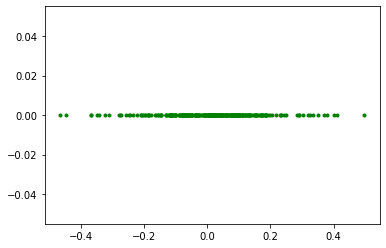

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(skew_array[i].cpu().numpy(),range(1),'g.')
    counter+=1
print(counter)

256


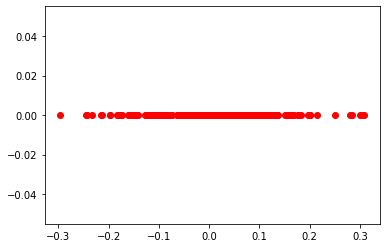

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(skew_array[i].cpu().numpy(),range(1),'ro')
    counter+=1
print(counter)


256


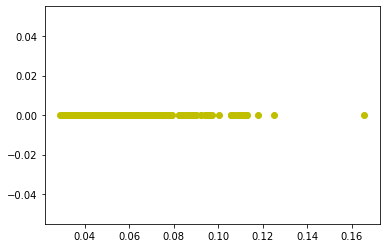

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(variance_array[i].cpu().numpy(),range(1),'yo')
    counter+=1
print(counter)


288


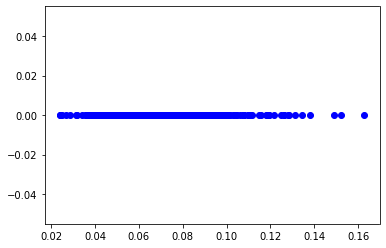

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(variance_array[i].cpu().numpy(),range(1),'bo')
    counter+=1
print(counter)

In [ ]:
total_data=torch.cat((torch.Tensor([]).to(device),variance_array),1)
print(total_data.shape)

torch.Size([544, 1])


<h1> multiple sensor based prediciton</h1>

In [ ]:
### visualing mean , variance and std;

36


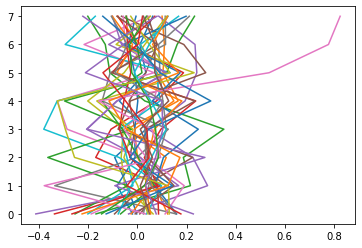

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(skew_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


32


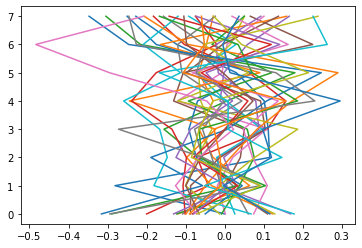

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(skew_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


36


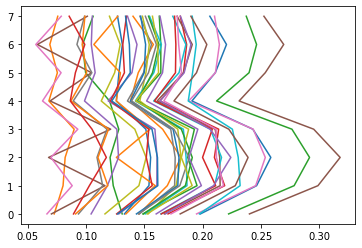

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(mean_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


32


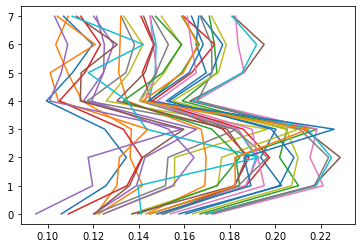

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(mean_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


36


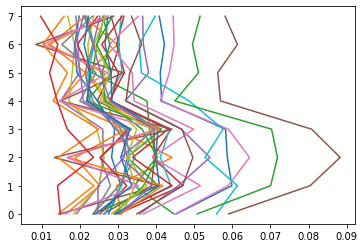

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(variance_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


32


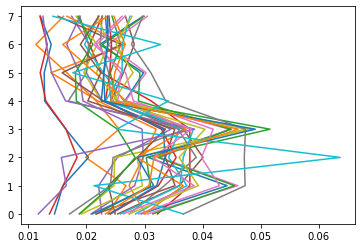

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(variance_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


32


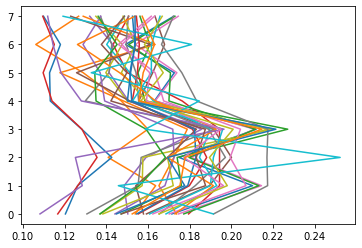

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==0:
    plt.plot(std_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


36


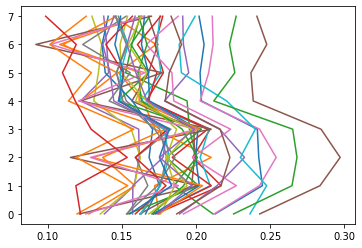

In [ ]:
counter=0

for i in range(len(y_data)):
  if y_data[i]==1:
    plt.plot(std_array[i].cpu().numpy(),range(8))
    counter+=1
print(counter)


In [ ]:
### accuracy
def accuracy(pred,y_val,thresh):
  
  pred_clone=torch.tensor(pred)
  pred_clone[pred_clone>=thresh]=1.
  pred_clone[pred_clone<thresh]=0.
  acc=torch.sum(pred_clone==y_val)/(y_val.shape[0])
  # print(torch.sum(pred_clone==y_val),pred_clone.shape,y_val.shape,thresh)
  return acc

In [ ]:
### tune thresh
def give_thresh(pred,y_val):
  # print(pred,y_val)
  thresh=0.01
  new_thresh=0.01
  acc=0
  while thresh<=1.:
    new_acc=accuracy(pred.detach().cpu(),y_val.cpu(),thresh)
    # print(thresh,new_acc)
    if new_acc>=acc:
      acc=new_acc
      new_thresh=thresh
    thresh+=0.01
  return new_thresh
  

In [ ]:
### validate model
def validate(model,criterion,x_val,y_val):
  pred=model(x_val)
  pred=torch.squeeze(pred,axis=-1)
  loss=criterion(pred,y_val)
  thresh=give_thresh(pred,y_val)
  acc=accuracy(pred,y_val,thresh)
  return loss,thresh,acc

In [ ]:
### train model 
def train(model_,x,y):
  model=model_().to(device)
  y_data_=y
  criterion=torch.nn.L1Loss()
  optimizer=torch.optim.Adam(model.parameters(),lr=.001,betas=(.5,.99))
  
  # y_data_[y_data==1.]=1.
  y_data_=torch.squeeze(y_data_,axis=-1).float()
  y_data_=y_data_.float()
  x_train=x[:-150]
  y_train=y_data_[:-150]
  
  x_val=x[-150:]
  y_val=y_data_[-150:]

  iters=20000
  thresh=50
  acc=0
  loss=0
  print("*******")
  for i in range(1,iters):
    if i%1000==0:
      print('\b\b\b\b\b\b\b\b%7s'%str(i))
    pred=model(x_train)
    # pred=torch.squeeze(pred,axis=-1)
    loss=criterion(pred,y_train)
    loss.backward()
    optimizer.step()
    if i%1000==0:
      if i % 1000000==0:
        pred=torch.squeeze(pred,axis=-1)
        y_train=torch.squeeze(y_train,axis=-1)
        print(pred.detach().cpu().numpy())
        print(y_train.cpu().numpy())
      train_loss,thresh_train,acc_train=validate(model,criterion,x,y_data_)
      if acc_train>acc:
        acc=acc_train
        thresh=thresh_train
      if acc_train.item()>.6:
        val_loss,thresh,acc=validate(model,criterion,x_val,y_val)
        print("i: ",i," t_l: ",loss.item(), " v_l: ",val_loss.item()," thresh: ",thresh," acc: ",acc.item()," weights: ",' '.join([str(x) for x in model.model[0].weight.detach().cpu().numpy()]))
        print('*******')
  print("iters: ",i," thresh_train: ",thresh," train_acc: ",acc)

<h1> 18th october </h1>

In [ ]:
# 1 segment 53.7,58.8, 58.8,58.8,55.5
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  train(Model1,array.to(device),y_data.to(device))

*******


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([394])) that is different to the input size (torch.Size([394, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


   1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
  17000
  18000
  19000
iters:  19999  thresh_train:  0.9000000000000006  train_acc:  tensor(0.5368, device='cuda:0')
*******
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
  17000
  18000
  19000
iters:  19999  thresh_train:  0.7200000000000004  train_acc:  tensor(0.5882, device='cuda:0')
*******
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13

In [ ]:
# 4 segments 64,57.7,56,55,66.7
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  train(Model4,array.to(device),y_data.to(device))

*******


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([394])) that is different to the input size (torch.Size([394, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


   1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
i:  16000  t_l:  0.481405109167099  v_l:  0.4641999304294586  thresh:  0.8500000000000005  acc:  0.6399999856948853  weights:  [ 0.6618902  -0.02535282  1.672541   -3.6679885 ]
*******
  17000
  18000
  19000
iters:  19999  thresh_train:  0.8500000000000005  train_acc:  tensor(0.6400, device='cuda:0')
*******
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
  17000
  18000
  19000
iters:  19999  thresh_train:  0.9300000000000006  train_acc:  tensor(0.5772, device='cuda:0')
*******
   1000


In [ ]:
# 100 segments 56.8, 56.6, 59.7 , 59.7, 52.9
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  train(Model100,array.to(device),y_data.to(device))

*******


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([394])) that is different to the input size (torch.Size([394, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


   1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
  17000
  18000
  19000
iters:  19999  thresh_train:  0.2900000000000001  train_acc:  tensor(0.5680, device='cuda:0')
*******
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13000
  14000
  15000
  16000
  17000
  18000
  19000
iters:  19999  thresh_train:  0.9300000000000006  train_acc:  tensor(0.5662, device='cuda:0')
*******
   1000
   2000
   3000
   4000
   5000
   6000
   7000
   8000
   9000
  10000
  11000
  12000
  13

In [ ]:
# 100 segments 72.78, 71.50, 69.85, 96.32, 84
from sklearn.svm import SVC
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  model=SVC().fit(array.cpu().numpy(),y_data[:,0].cpu().numpy())
  acc=np.sum(model.predict(array.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)
  print(acc)

0.7279411764705882
0.7150735294117647
0.6985294117647058
0.9632352941176471
0.8400735294117647


In [ ]:
# 4 segments 71,62,66,62,62
from sklearn.svm import SVC
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  model=SVC().fit(array.cpu().numpy(),y_data[:,0].cpu().numpy())
  acc=np.sum(model.predict(array.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)
  print(acc)

0.71875
0.6231617647058824
0.6617647058823529
0.6231617647058824
0.625


In [ ]:
# 1 segments 59,59,59,57.72,55.88
from sklearn.svm import SVC
for array in [mean_array,variance_array,std_array,skew_array,kurtosis_array]:
  model=SVC().fit(array.cpu().numpy(),y_data[:,0].cpu().numpy())
  acc=np.sum(model.predict(array.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)
  print(acc)

0.5919117647058824
0.5919117647058824
0.5919117647058824
0.5772058823529411
0.5588235294117647


In [ ]:
# 20 size segment skew array: 99.63
from sklearn.svm import SVC
for array in [skew_array]:
  model=SVC().fit(array.cpu().numpy(),y_data[:,0].cpu().numpy())
  acc=np.sum(model.predict(array.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)
  print(acc)

0.9963235294117647


<h1> training area for single sensor based prediciton</h1>

In [ ]:
##### multplie segments.
train(Model1,total_data.to(device),y_data.to(device))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([394])) that is different to the input size (torch.Size([394, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


iters:  1000  thresh_train:  0.8600000000000005  train_acc:  tensor(0.5294, device='cuda:0')
iters:  2000  thresh_train:  0.8500000000000005  train_acc:  tensor(0.5294, device='cuda:0')
iters:  3000  thresh_train:  0.8700000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  4000  thresh_train:  0.8900000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  5000  thresh_train:  0.9200000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  6000  thresh_train:  0.9800000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  7000  thresh_train:  0.9800000000000006  train_acc:  tensor(0.5349, device='cuda:0')
iters:  8000  thresh_train:  0.9200000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  9000  thresh_train:  0.9000000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  10000  thresh_train:  0.8800000000000006  train_acc:  tensor(0.5294, device='cuda:0')
iters:  11000  thresh_train:  0.8600000000000005  train_acc:  tensor(

In [ ]:

from sklearn.svm import SVC
model=SVC().fit(total_data.cpu().numpy(),y_data.cpu().numpy())
np.sum(model.predict(total_data.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5919117647058824

In [ ]:
train(Model5,total_data.to(device),y_data.to(device))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([394])) that is different to the input size (torch.Size([394, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


iters:  1000  thresh_train:  0.5300000000000002  train_acc:  tensor(0.5938, device='cuda:0')
iters:  2000  thresh_train:  0.7400000000000004  train_acc:  tensor(0.6103, device='cuda:0')
i:  2000  t_l:  0.48818129301071167  v_l:  0.4393391013145447  thresh:  0.7800000000000005  acc:  0.7066667079925537  weights:  [ 0.85850227  0.76191896  0.25821176 -0.02212222  0.13695955]
iters:  3000  thresh_train:  0.36000000000000015  train_acc:  tensor(0.5294, device='cuda:0')
iters:  4000  thresh_train:  0.9900000000000007  train_acc:  tensor(0.4706, device='cuda:0')
iters:  5000  thresh_train:  0.03  train_acc:  tensor(0.5257, device='cuda:0')
iters:  6000  thresh_train:  0.09999999999999999  train_acc:  tensor(0.5294, device='cuda:0')
iters:  7000  thresh_train:  0.02  train_acc:  tensor(0.5202, device='cuda:0')
iters:  8000  thresh_train:  0.15  train_acc:  tensor(0.5312, device='cuda:0')
iters:  9000  thresh_train:  0.6900000000000004  train_acc:  tensor(0.5294, device='cuda:0')
iters:  10000

<h1> end of single sensor based training area</h1>

In [ ]:
#var_std=torch.cat((variance_array,std_array),axis=1)
# print(var_std.shape)
train(Model,skew_array.to(device),y_data.to(device))

RuntimeError: ignored

In [ ]:
var_std=torch.cat((variance_array,skew_array),axis=1)
print(var_std.shape)
train(Model2,var_std,y_data)

torch.Size([68, 16])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([68])) that is different to the input size (torch.Size([68, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


iters:  1000  thresh_train:  0.7000000000000004  train_acc:  tensor(0.5294, device='cuda:0')
iters:  2000  thresh_train:  0.7000000000000004  train_acc:  tensor(0.5294, device='cuda:0')
iters:  3000  thresh_train:  0.9200000000000006  train_acc:  tensor(0.5735, device='cuda:0')
iters:  4000  thresh_train:  0.9200000000000006  train_acc:  tensor(0.5735, device='cuda:0')
iters:  5000  thresh_train:  0.9100000000000006  train_acc:  tensor(0.5441, device='cuda:0')
iters:  6000  thresh_train:  0.9000000000000006  train_acc:  tensor(0.5588, device='cuda:0')
iters:  7000  thresh_train:  0.7400000000000004  train_acc:  tensor(0.5294, device='cuda:0')
iters:  8000  thresh_train:  0.8200000000000005  train_acc:  tensor(0.5294, device='cuda:0')
iters:  9000  thresh_train:  0.7900000000000005  train_acc:  tensor(0.5294, device='cuda:0')
iters:  10000  thresh_train:  0.8000000000000005  train_acc:  tensor(0.5294, device='cuda:0')
iters:  11000  thresh_train:  0.9100000000000006  train_acc:  tensor(

KeyboardInterrupt: ignored

In [ ]:
from sklearn.svm import SVC
model=SVC().fit(total_data.cpu().numpy(),y_data.cpu().numpy())

In [ ]:
x_data_all=torch.cat((torch.Tensor([]).to(device),variance_array,std_array),axis=1)
print(x_data_all.shape)

torch.Size([68, 16])


In [ ]:
model=SVC().fit(total_data.cpu().numpy(),y_data.cpu().numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.sum(model.predict(total_data.cpu().numpy())==y_data[:,0].cpu().numpy())/len(y_data)

0.5827205882352942

In [ ]:
var_std=torch.cat((variance_array,skew_array),axis=1)
print(var_std.shape)
train(Model2,var_std,y_data)

torch.Size([68, 16])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([58])) that is different to the input size (torch.Size([58, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


iters:  1000  thresh_train:  0.02  train_acc:  tensor(0.5735, device='cuda:0')
iters:  2000  thresh_train:  0.02  train_acc:  tensor(0.5147, device='cuda:0')
iters:  3000  thresh_train:  0.060000000000000005  train_acc:  tensor(0.5147, device='cuda:0')
iters:  4000  thresh_train:  0.03  train_acc:  tensor(0.6471, device='cuda:0')
i:  4000  t_l:  0.4843285381793976  v_l:  0.7710233330726624  thresh:  0.02  acc:  0.800000011920929  weights:  [ 2.1942525  -2.2415092   0.20030949  0.20462535  0.351024    1.1402305
 -2.4380445   1.6906307   0.09815478  0.07270739 -0.11159378  0.02216423
 -0.00294709  0.09124236 -0.08297814  0.07563976]
iters:  5000  thresh_train:  0.09  train_acc:  tensor(0.5882, device='cuda:0')
iters:  6000  thresh_train:  0.060000000000000005  train_acc:  tensor(0.5882, device='cuda:0')
iters:  7000  thresh_train:  0.10999999999999999  train_acc:  tensor(0.5441, device='cuda:0')
iters:  8000  thresh_train:  0.05  train_acc:  tensor(0.6324, device='cuda:0')
i:  8000  t_l:

In [ ]:
print(variance_array.shape,y_data.shape)

torch.Size([68, 8]) torch.Size([68, 1])


In [ ]:
### training on std
train(Model,std_array,y_data)
### training on mean
train(Model,mean_array,y_data)
### training on variance
train(Model,variance_array,y_data)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


iters:  1000  train loss:  4858.95458984375  val loss:  6797.27734375  thresh:  0  acc:  7.0  weights:  [0.95193446 0.454328   0.7498737  0.68566525 0.97355306 0.7813556
 0.5348695  0.46408466]
iters:  2000  train loss:  4736.77001953125  val loss:  6621.26611328125  thresh:  0  acc:  7.0  weights:  [1.486357  0.9887583 1.2842841 1.2200739 1.5079657 1.3157878 1.0692819
 0.9985182]
iters:  3000  train loss:  4620.97607421875  val loss:  6453.37841796875  thresh:  0  acc:  7.0  weights:  [2.0059998 1.5084106 1.8039173 1.7397053 2.027599  1.8354424 1.5889164
 1.5181742]
iters:  4000  train loss:  4509.42529296875  val loss:  6290.57373046875  thresh:  0  acc:  7.0  weights:  [2.5196886 2.0221074 2.3175945 2.2533813 2.5412784 2.3491395 2.1025953
 2.031872 ]
iters:  5000  train loss:  4401.4501953125  val loss:  6131.90380859375  thresh:  0  acc:  7.0  weights:  [3.030133  2.53256   2.828027  2.7638113 3.0517125 2.8595946 2.6130295
 2.5423284]
iters:  6000  train loss:  4296.751953125  val 

In [ ]:
### train model
def train():
  model=Model().to(device)
  criterion=torch.nn.MSELoss()
  optimizer=torch.optim.Adam(model.parameters(),lr=.0001,betas=(0.,.99))
  # y_data_=torch.squeeze(y_data,axis=-1).float()
  y_data_=y_data
  y_data_[y_data==1.]=1000
  y_data_=y_data_.float()
  x_train=new_data[:-250]
  y_train=y_data_[:-250]
  
  x_val=new_data[-250:]
  y_val=y_data_[-250:]

  iters=1000000
  thresh=50
  for i in range(iters):
    pred=model(x_train)
    # pred=torch.squeeze(pred,axis=-1)
    loss=criterion(pred,y_train)
    loss.backward()
    optimizer.step()
    if i%10000==0:
      if i % 100000==0:
        pred=torch.squeeze(pred,axis=-1)
        y_train=torch.squeeze(y_train,axis=-1)
        print(pred.detach().cpu().numpy())
        print(y_train.cpu().numpy())
        
      val_loss,tresh,acc=validate(model,criterion,x_val,y_val,thresh)
      print("iters: ",i," train loss: ",loss.item(), " val loss: ",val_loss.item()," weights: ",' '.join([str(x) for x in model.model[0].weight.detach().cpu().numpy()]))


In [ ]:
a=[1,2]

In [ ]:
b=torch.Tensor(a)

In [ ]:
b

tensor([1., 2.])

In [ ]:
c=torch.Tensor(b)

In [ ]:
c

tensor([1., 2.])